In [72]:
from shapely.geometry import Point, GeometryCollection, LineString
import geopandas as gpd
from shapely import wkt
import numpy as np
from dbfread import DBF
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib as plt
%matplotlib inline

# read database and transform it into DataFrame format

In [30]:
se_db = DBF("./SE_File.dbf")
vehicle_db = DBF("./VO_VehOwn_BY_2019.dbf")

In [31]:
se_df=pd.DataFrame(iter(se_db))
vehicle_df=pd.DataFrame(iter(vehicle_db))

In [39]:
se_df.head()

,Z,CO_TAZID,SUBAREAID,TOTHH,HHPOP,HHSIZE,TOTEMP,RETEMP,INDEMP,OTHEMP,...,ENROL_HIGH,CO_FIPS,CO_NAME,CITY_NAME,DISTLRG,DLRG_NAME,DISTMED,DMED_NAME,DISTSML,DSML_NAME
0,1,30001,1,1.1,2.1,1.91,0.0,0.0,0.0,0.0,...,0,3,BOX ELDER,Box Elder County,1,WFRC - BE,1,North of Brigham City,1,North of Brigham City
1,2,30002,1,15.2,45.9,3.02,3.6,0.9,2.7,0.0,...,0,3,BOX ELDER,Box Elder County,1,WFRC - BE,1,North of Brigham City,1,North of Brigham City
2,3,30003,1,5.1,12.6,2.47,2.6,0.0,2.6,0.0,...,0,3,BOX ELDER,Box Elder County,1,WFRC - BE,1,North of Brigham City,1,North of Brigham City
3,4,30004,1,21.0,39.3,1.87,24.1,1.8,18.0,4.3,...,0,3,BOX ELDER,Box Elder County,1,WFRC - BE,1,North of Brigham City,1,North of Brigham City
4,5,30005,1,30.5,78.6,2.58,69.5,0.3,68.2,1.0,...,0,3,BOX ELDER,Box Elder County,1,WFRC - BE,1,North of Brigham City,1,North of Brigham City


In [40]:
vehicle_df.head()

,Z,HHV0,HHV1,HHV2,HHV3,V0,V1,V2,V3,AUTOS,SUMHH,APHH,SEHH,PCTV0B,PCTV1B,PCTV2B,PCTV3B
0,1,0.1,0.3,0.5,0.2,0.0,0.3,0.9,0.7,1.9,1.0,1.89,1.1,5,29,45,21
1,2,0.5,2.9,6.9,4.9,0.0,2.9,13.8,17.0,33.7,15.2,2.22,15.2,3,19,45,33
2,3,0.2,1.3,2.3,1.4,0.0,1.3,4.6,4.8,10.7,5.2,2.07,5.1,4,24,44,28
3,4,1.1,6.5,9.5,3.9,0.0,6.5,18.9,13.7,39.1,21.0,1.86,21.0,5,30,45,20
4,5,1.3,7.3,13.4,8.6,0.0,7.3,26.8,30.1,64.2,30.6,2.10,30.5,4,23,43,30


fileds:

HHV1: the number of household with 0 vehicle

V1: number of vehilces that HHV1 have

AUTOS: total number of vehicles in this TAZ

SUMHH: total humber of HH

In [35]:
new_se_df=pd.merge(se_df,vehicle_df,left_on='Z',right_on='Z')

In [41]:
new_se_df.head()

,Z,CO_TAZID,SUBAREAID,TOTHH,HHPOP,HHSIZE,TOTEMP,RETEMP,INDEMP,OTHEMP,...,V2,V3,AUTOS,SUMHH,APHH,SEHH,PCTV0B,PCTV1B,PCTV2B,PCTV3B
0,1,30001,1,1.1,2.1,1.91,0.0,0.0,0.0,0.0,...,0.9,0.7,1.9,1.0,1.89,1.1,5,29,45,21
1,2,30002,1,15.2,45.9,3.02,3.6,0.9,2.7,0.0,...,13.8,17.0,33.7,15.2,2.22,15.2,3,19,45,33
2,3,30003,1,5.1,12.6,2.47,2.6,0.0,2.6,0.0,...,4.6,4.8,10.7,5.2,2.07,5.1,4,24,44,28
3,4,30004,1,21.0,39.3,1.87,24.1,1.8,18.0,4.3,...,18.9,13.7,39.1,21.0,1.86,21.0,5,30,45,20
4,5,30005,1,30.5,78.6,2.58,69.5,0.3,68.2,1.0,...,26.8,30.1,64.2,30.6,2.10,30.5,4,23,43,30


# the database does not record the geographical location information.
# need to download TAZ data from WFRC and join tables by "CO_TAZID"

In [38]:
hh_gdf=gpd.read_file("Household_Projections_(TAZ).geojson")

In [43]:
hh_gdf.head()

,OBJECTID,CityArea,ModelArea,CO_TAZID,DEVACRES,CO_FIPS,CO_NAME,TAZID,RELEASE,SECategory,...,CH15TO19D,CH19TO24D,CH24TO30D,CH30TO40D,CH40TO50D,MOREINFO,IntPtPerKM2,SHAPE_Length,SHAPE_Area,geometry
0,1,Cache County Other,Cache Travel Model,50639,3078.5758,5,CACHE,639,,TOTHH,...,0.000000,0.000000,0.000000,0.000000,0.000000,https://wfrc.org/programs/models-forecasting/,None,0.185091,0.001478,"MULTIPOLYGON (((-112.04079 41.99793, -112.0409..."
1,2,Cache County Other,Cache Travel Model,50641,4916.6392,5,CACHE,641,,TOTHH,...,0.000000,0.000203,0.000000,0.000407,0.000000,https://wfrc.org/programs/models-forecasting/,None,0.208070,0.002663,"MULTIPOLYGON (((-111.98711 41.94641, -112.0115..."
2,3,Clarkston,Cache Travel Model,50050,163.4845,5,CACHE,50,,TOTHH,...,0.012234,0.024467,0.042818,0.067284,0.048935,https://wfrc.org/programs/models-forecasting/,None,0.035878,0.000072,"MULTIPOLYGON (((-112.05445 41.92776, -112.0532..."
3,4,Cache County Other,Cache Travel Model,50663,1064.0262,5,CACHE,663,,TOTHH,...,0.000000,0.000000,0.000000,0.000000,0.000000,https://wfrc.org/programs/models-forecasting/,None,0.155363,0.000747,"MULTIPOLYGON (((-112.06398 41.90097, -112.0618..."
4,5,Cache County Other,Cache Travel Model,50659,456.9688,5,CACHE,659,,TOTHH,...,0.000000,0.000000,0.002188,0.000000,0.000000,https://wfrc.org/programs/models-forecasting/,None,0.064069,0.000201,"MULTIPOLYGON (((-112.01559 41.91530, -112.0154..."


# only save key features and join SE dataframe

In [45]:
hh_gdf_modify=hh_gdf[['OBJECTID', 'CityArea', 'ModelArea', 'CO_TAZID', 'DEVACRES', 'CO_FIPS',
       'CO_NAME', 'TAZID', 'RELEASE', 'SECategory', 'YEAR2015', 
       'MOREINFO', 'IntPtPerKM2', 'SHAPE_Length', 'SHAPE_Area',
       'geometry']]

In [51]:
hh_merge_df=pd.merge(new_se_df,hh_gdf_modify,left_on='CO_TAZID',right_on='CO_TAZID',how='left')
hh_merge_gdf=gpd.GeoDataFrame(hh_merge_df,geometry='geometry')

<AxesSubplot:>

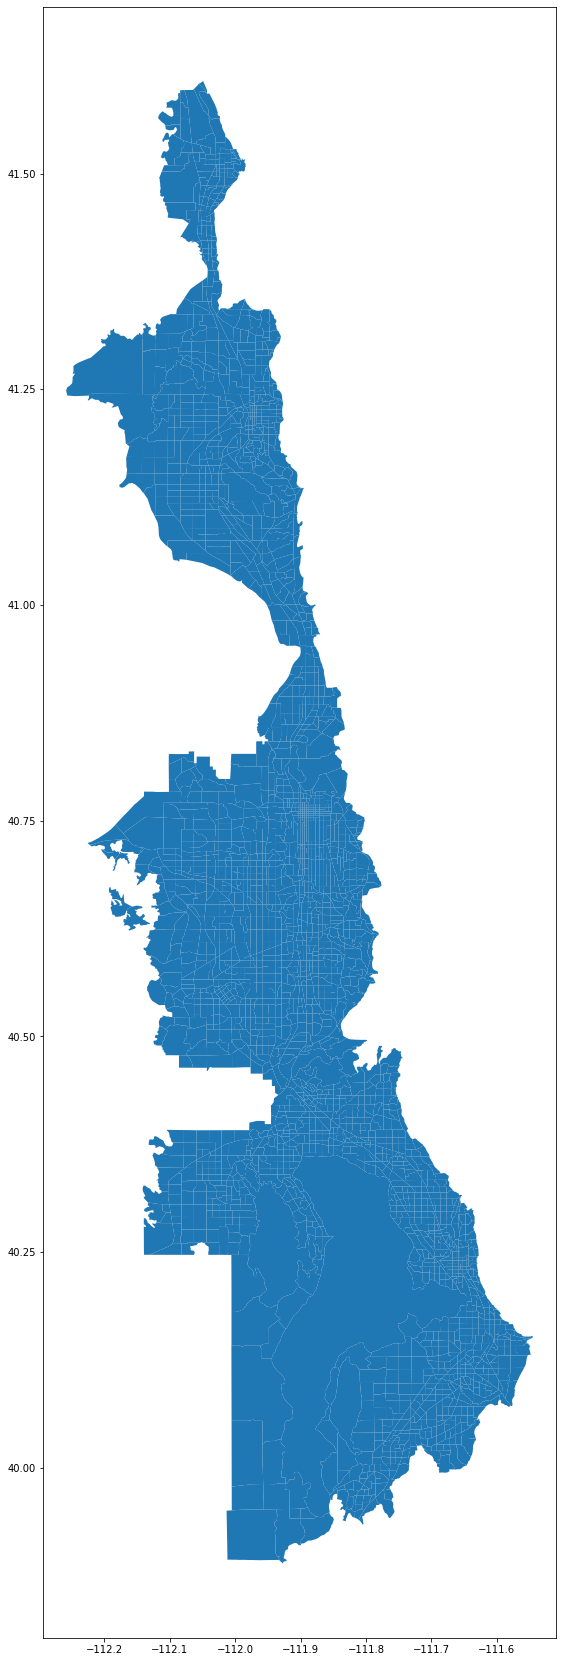

In [63]:
hh_merge_gdf.plot(figsize=(15,30))

# get TAZs in our study region

In [64]:
hh_merge_cut_gdf=hh_merge_gdf.cx[-112.10077:-111.752637,40.44023:40.71772]

<AxesSubplot:>

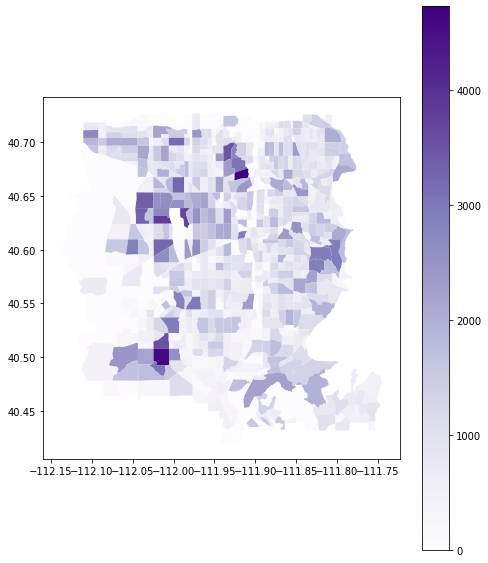

In [79]:
hh_merge_cut_gdf.plot(figsize=(8,10),column='AUTOS',cmap='Purples',legend=True)

In [109]:
f"total number of HH: {hh_merge_cut_gdf['SUMHH'].sum()}, and total number of vehicles: {hh_merge_cut_gdf['AUTOS'].sum()}"


'total number of HH: 336865.19999999995, and total number of vehicles: 691101.2'

# In the next step, generate synthetical vehicle HH distribution

In [99]:
def sampling(min_lon,min_lat,max_lon,max_lat,poly_obj):
    while True:
        rand_lon=np.random.uniform(low=min_lon,high=max_lon)
        rand_lat=np.random.uniform(low=min_lat,high=max_lat)
        point=Point(rand_lon,rand_lat)
        if point.within(polygon):
            break
    #print(point,point.within(polygon))
    return rand_lon,rand_lat,point

In [108]:
vehicle_id=0
sample_list=[]

for i in range(len(hh_merge_cut_gdf)):
    min_lon,max_lon,min_lat,max_lat=hh_merge_cut_gdf.bounds.iloc[i]
    polygon=hh_merge_cut_gdf['geometry'].iloc[i]
    num_vehicle=int(hh_merge_cut_gdf['AUTOS'].iloc[i])
    co_tazid=hh_merge_cut_gdf['CO_TAZID'].iloc[i]
    tazid=hh_merge_cut_gdf['TAZID'].iloc[i]
    co_name=hh_merge_cut_gdf['CO_NAME_x'].iloc[i]
    
    #sample vehicle for each TAZ 
    for _ in range(num_vehicle):
        rand_lon,rand_lat,point=sampling(min_lon,max_lon,min_lat,max_lat,polygon)
        vehicle_id+=1
        sample_list.append([vehicle_id,rand_lon,rand_lat,point,co_tazid,co_name,tazid])

In [110]:
sample_gdf=gpd.GeoDataFrame(sample_list,columns=['vehicle_id','lon','lat','geometry','CO_TAZID','CO_NAME','TAZID'])

In [111]:
sample_gdf

,vehicle_id,lon,lat,geometry,CO_TAZID,CO_NAME,TAZID
0,1,-112.093325,40.714018,POINT (-112.09333 40.71402),350695,SALT LAKE,695.0
1,2,-112.096046,40.713698,POINT (-112.09605 40.71370),350695,SALT LAKE,695.0
2,3,-112.099642,40.716035,POINT (-112.09964 40.71604),350695,SALT LAKE,695.0
3,4,-112.108390,40.718147,POINT (-112.10839 40.71815),350695,SALT LAKE,695.0
4,5,-112.093836,40.717949,POINT (-112.09384 40.71795),350695,SALT LAKE,695.0
...,...,...,...,...,...,...,...
690761,690762,-111.755104,40.436757,POINT (-111.75510 40.43676),492138,UTAH,2138.0
690762,690763,-111.756276,40.438481,POINT (-111.75628 40.43848),492138,UTAH,2138.0
690763,690764,-111.756534,40.433155,POINT (-111.75653 40.43315),492138,UTAH,2138.0
690764,690765,-111.757542,40.437224,POINT (-111.75754 40.43722),492138,UTAH,2138.0


In [112]:
sample_gdf.to_csv("synthetical_vehicle_distribution.csv")

<AxesSubplot:>

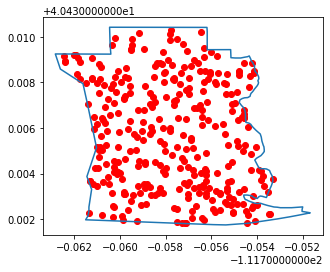

In [121]:
base=hh_merge_cut_gdf[hh_merge_cut_gdf['CO_TAZID']==492138].boundary.plot()
sample_gdf[sample_gdf['CO_TAZID']==492138].plot(ax=base,color='red')